<a href="https://colab.research.google.com/github/Sophie-wang22/math-50/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab and Python

hi everyone

We will be using colab notebooks in class and for homework assignments. 

In [ ]:
string = "hello world"
print(string)

hello world


In [ ]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [ ]:
# some math
a = 10
b = 6
z = a + b
print(z)

16


In [ ]:
# lists
A = [1,2,3,3,5]
A

[1, 2, 3, 3, 5]

In [ ]:
# loops, if statements, making lists
sum = 0
for k in A:
  print(k)
  sum = sum+k
print(sum)


1
2
3
3
5
14


In [ ]:
# functions
def my_sum(A):
  sum = 0
  for k in A:
    sum = sum+k
  return sum


In [ ]:
my_sum([1,1,1,2])

5

## Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading some data in pandas

In [ ]:
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");
print(data)

    year  growth   vote inc_party_candidate other_candidate
0   1952    2.40  44.60           Stevenson      Eisenhower
1   1956    2.89  57.76          Eisenhower       Stevenson
2   1960    0.85  49.91               Nixon         Kennedy
3   1964    4.21  61.34             Johnson       Goldwater
4   1968    3.02  49.60            Humphrey           Nixon
5   1972    3.62  61.79               Nixon        McGovern
6   1976    1.08  48.95                Ford          Carter
7   1980   -0.39  44.70              Carter          Reagan
8   1984    3.86  59.17              Reagan         Mondale
9   1988    2.27  53.94           Bush, Sr.         Dukakis
10  1992    0.38  46.55           Bush, Sr.         Clinton
11  1996    1.04  54.74             Clinton            Dole
12  2000    2.36  50.27                Gore       Bush, Jr.
13  2004    1.72  51.24           Bush, Jr.           Kerry
14  2008    0.10  46.32              McCain           Obama
15  2012    0.95  52.00               Ob

In [ ]:
# getting values, conditional indexing
data.vote.values[0]

data.vote.values[0:5]

array([44.6 , 57.76, 49.91, 61.34, 49.6 ])

In [ ]:
# taking means, variance
np.std(data.vote)

5.430843626914698

## Plotting

Text(0, 0.5, 'vote share')

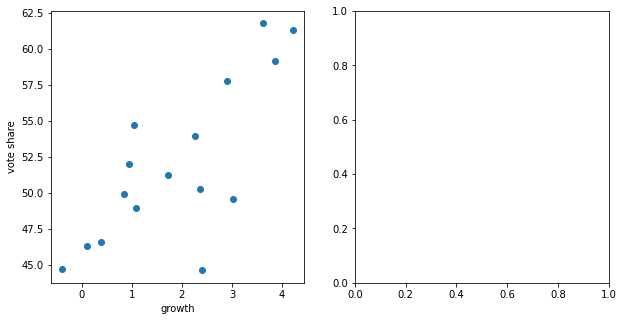

In [ ]:
# a simple point plot
fig,ax = plt.subplots(figsize=(10,5),ncols=2)
ax1 = ax[0]
ax1.plot(data.growth,data.vote,"o")
ax1.set_xlabel("growth")
ax1.set_ylabel("vote share")

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a col

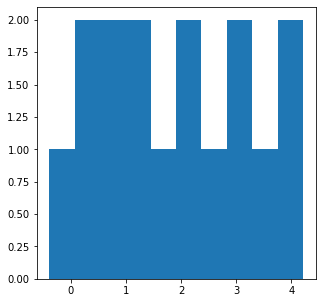

In [ ]:
# a histogram
fig,zzz = plt.subplots(figsize=(5,5))
zzz.hist(data.growth)
help(plt.subplots)

# Sampling from probability distributions

Probability distributions are a way for us to model randomness in data. A probability distribution $p(x)$ tells us how likely $x$ is to fall in a given range. In regression models, we usually use the Normal distribution to model randomness, so it's important to understand how to work with simulated data from the the Normal distribution.

Of course in reality, our data is never really sampled from a Normal distribution, and we will spend considerable time later in the course discussing when this is and is not a good approximation. 

For now, recall the **central limit theorem**: if we add up a bunch of random things, the distribution of their sum, rescalled by the number of samples, is approximately Normal. 

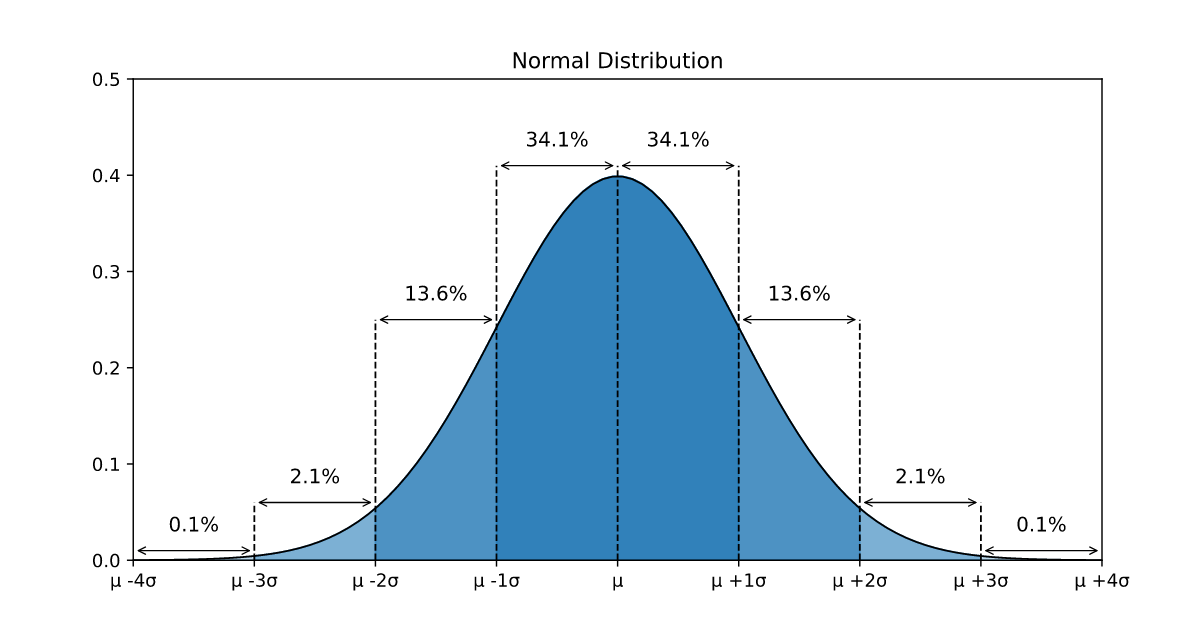

In [ ]:
np.random.normal(0,1)

0.2861562519646127

In [ ]:
# generating normal random samples
samples = np.random.normal(0,1.,10000)
samples

array([-0.47063907, -0.18010609, -1.67177758, ..., -0.93668918,
        0.57141672,  0.62055351])

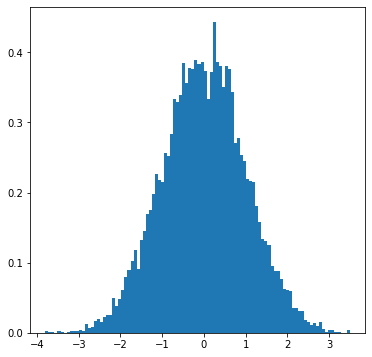

In [ ]:
# we can check that the distribution is indeed a "bell curve"
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(samples,100,density=True);

In [ ]:
# estimate the probability that a is less than some number
len(samples[(samples>-1) & (samples<1)])/len(samples)

0.6801

In [ ]:
# mean and standard deviation
np.std(samples)

1.0024062410373789

In [ ]:
# adding and subtracting
s1 = np.random.normal(50,10,10000)
s2 = np.random.normal(51.,10,10000)

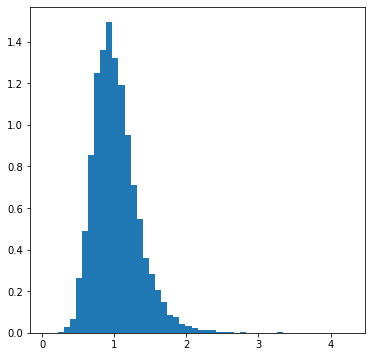

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(s1/s2,50,density=True);

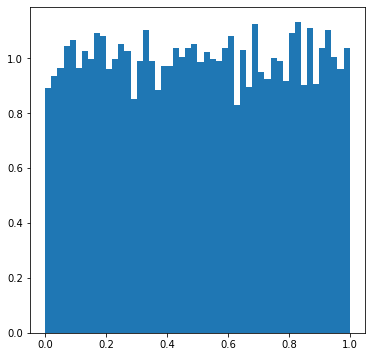

In [ ]:
samples = np.random.uniform(0,1,10000)
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(samples,50,density=True);


# The linear regression model with a single predictor



A model is an assumption about how the data is generated. The model we will work with for most of this class is the *linear regression model*.

For a linear regression model, we will *assume* that the relationship between $x$ and $y$ is linear. It is never the case that the relationship is *exactly* linear, thus, we add some **noise**, denoted $\epsilon_i$, to our model to obtain:
\begin{equation}
y_i = a_1x_{1,i} + a_2x_{2,i} + \cdots + b + \epsilon_i
\end{equation}

With only a single predictor, this becomes
\begin{equation}
y_i = ax_i + b + \epsilon_i
\end{equation}
Importantly, $a$ and $b$ are the same for every $x$ and $y$ point, but $\epsilon_i$ is different. We therefore need to decide how model this source of noise. It is common (but not always correct) to assume $\epsilon$ are independent and normaly distributed random variables for each $x$, with mean $0$ and variance $\sigma^2$. Sometimes we write this as 
\begin{equation}
\epsilon \sim N(0,\sigma).
\end{equation} We will discuss this assumption in greater detial throughout the course. For now, think of it as saying "for a given $x$ value the $y$ values are on average going to fall on a line $ax + b$, but with some variation around that.

## Generating data fron a linear regression model

In [ ]:
x = np.array([-0.1,0,0.2,0.2,0.25,0.31,0.4,0.45,0.46,0.47])

# there are our parameters
a = 1.0
b = 2.0
sigma = 0.2


# this generates data from out model
y = a*x + b + np.random.normal(0,sigma,len(x))
y

array([1.90383596, 1.81270752, 2.38557379, 2.40959874, 2.15802958,
       2.5883719 , 2.39044965, 2.31653878, 2.2748391 , 2.86292987])

In [ ]:
# We can put this in a dataframe
fake_data = pd.DataFrame({"thing1":x,"thing2":y})
fake_data

,thing1,thing2
0,-0.10,1.903836
1,0.00,1.812708
2,0.20,2.385574
3,0.20,2.409599
4,0.25,2.158030
5,0.31,2.588372
6,0.40,2.390450
7,0.45,2.316539
8,0.46,2.274839
9,0.47,2.862930


## Fitting

In [ ]:
import statsmodels.api as sm

In [ ]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and a

In [ ]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     9.928
Date:                Tue, 14 Sep 2021   Prob (F-statistic):             0.0136
Time:                        15:35:45   Log-Likelihood:                 2.2181
No. Observations:                  10   AIC:                           -0.4362
Df Residuals:                       8   BIC:                            0.1690
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0041      0.119     16.854      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
# slope and intercept
b_fit,a_fit = results.params

# standard error
sigma_fit = np.sqrt(results.mse_resid)

In [ ]:
x*a_fit + b_fit

array([1.88813406, 2.00411028, 2.23606271, 2.23606271, 2.29405082,
       2.36363655, 2.46801514, 2.52600325, 2.53760087, 2.5491985 ])

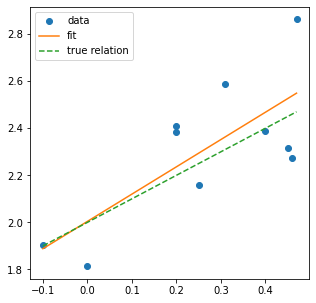

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x,y,"o",label="data")
ax.plot(x,x*a_fit + b_fit,"-",label="fit") 
ax.plot(x,x*a+ b,"--",label="true relation")
ax.legend()

## Making predictions

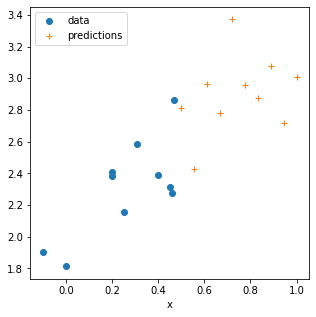

In [ ]:
# make predictions for average values and new data points
x_pred = np.linspace(0.5,1,10)
y_pred = x_pred*a_fit + b_fit + np.random.normal(0,sigma_fit,len(x_pred))
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x,y,"o",label="data")
ax.plot(x_pred,y_pred,"+",label="predictions")
ax.set_xlabel("x")
ax.legend()

## Example: predicting elections

Using the linear regression model, how would we determine: what is the chance that the incumbent wins an election given the the economic growth during their term is $5$? 

In [ ]:
x,y = data.growth.values,data.vote.values


model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           0.000610
Time:                        15:54:59   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2476      1.622     28.514      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [ ]:
b_fit,a_fit = results.params
sigma_fit = np.sqrt(results.mse_resid)

In [ ]:
sim_vote =  np.random.normal(5*a_fit + b_fit,sigma_fit,1000000)
sim_vote


array([58.95012085, 50.86083729, 63.53202143, ..., 66.33079226,
       63.08740059, 61.74273   ])

In [ ]:
len(sim_elections[sim_elections>50])/len(sim_elections)

0.998954

## How does OLS work? 

The OLS function in statsmodels finds the "best" fit line for the data, but what does "best" mean? In-fact, there are many ways to draw a line through the data and which is best depends on the context (as we will see). 

OLS does least squares, the most commen technique for drawing a line through data. 

First, some notation:

*   We often use $\hat{}$ to distinguish fitted coefficents from the real ones, e.g. $\hat{a}$ is out fit of $a$. 
*   We define the residuals as $r_i = y_i - (\hat{a} + \hat{b}x_i)$. This is different from $\epsilon$, can you see why?
* We use $\bar{}$ to represent a sample average, e.g. $\bar{y} = \frac{1}{n}\sum_i y_i$. 

What OLDs does if find the values of $\hat{a}$ and $\hat{b}$ which make $\sum_ir_i^2$ smallest. 

What about the $\hat{\sigma}^2$? To find this, remember that to find the standard deviation of a set of numbers $y_i$, we use
\begin{equation}
{\rm std} = \sqrt{\frac{1}{n-2}\sum_i y_i^2}.
\end{equation}
To get $\hat{\sigma}$, we don't exactly want the standard deviation, we want to know how much variation there is once you subtract the fitted line, this is
\begin{equation}
\hat{\sigma} = \sqrt{\frac{1}{n-2}\sum_i r_i^2}
\end{equation}



## $p$-values

$p$-values help us answer the question: is a pattern we are seeing in the data real? 

There are many ways to define a $p$-value for the coefficients in a regression, but roughly speaking, they all represent the *probability to obtain a coefficient at least as large or small the the fitted coefficient if the the true coefficient was zero.*


Or is it just random chance? To better understand what $p$-values represents, let's do a numerical experiment.

In [ ]:
x = np.array([0,0.5,2,6,7])
y = 0.2*x + 0.5 + np.random.normal(0,0.5,len(x))
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
t_state = results.params[1]/results.bse[1]
t_state

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     3.675
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.151
Time:                        21:02:26   Log-Likelihood:                -1.0408
No. Observations:                   5   AIC:                             6.082
Df Residuals:                       3   BIC:                             5.300
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7098      0.253      2.803      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


1.9170447964545778

Text(0.5, 0, 'slopes')

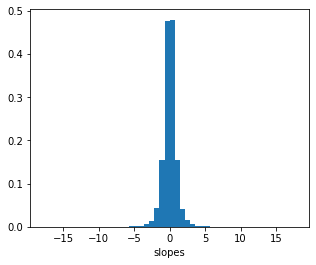

In [ ]:
slopes = []
for s in range(40000):
  x = np.array([0,0.5,2,6,7])
  y = 0.5 + np.random.normal(0,0.5,len(x))
  X = sm.add_constant(x)
  model = sm.OLS(y,X)
  results = model.fit()
  slopes.append((results.params[1]/results.bse[1]))
slopes = np.array(slopes)

fig,ax = plt.subplots(figsize=(5,4))
ax.hist((slopes - np.mean(slopes))/np.std(slopes),bins=50,density=True);

ax.set_xlabel("slopes")


In [ ]:
len(slopes[np.abs(slopes)>t_state])/len(slopes)

0.0047

In [ ]:
np.random.standard_t(10)

0.8877734779803784

## $R^2$

The $R^2$ value helps us answer the question: how much of the variation in the data is explained by the regression model? 

In [ ]:
x = np.random.normal(0,1,10000)
y = 0.1*x + 0.5 + np.random.normal(0,0.5,len(x))
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     489.7
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          5.68e-106
Time:                        16:49:58   Log-Likelihood:                -7247.0
No. Observations:               10000   AIC:                         1.450e+04
Df Residuals:                    9998   BIC:                         1.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4937      0.005     98.844      0.0

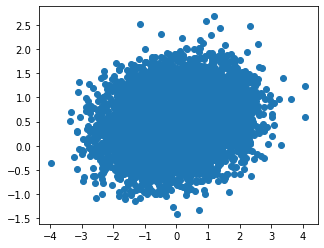

In [ ]:
fig, ax =plt.subplots(figsize=(5,4))
ax.plot(x,y,"o")